<a href="https://colab.research.google.com/github/ravichandra7781/191911525-FINALPROJECT2023/blob/main/PROJECTCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from google.colab import drive
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
import seaborn as sns
from collections import Counter
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/harmansingh25/ML_Project_2021/main/Stroke_analysis1%20-%20Stroke_analysis1.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,pid,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,1,PID2829938,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,2,PID1833441,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,3,PID8745027,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,4,PID4568062,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,5,PID3855176,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,PID11726,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,4795,PID11727,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,4796,PID11728,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,4797,PID11729,64,Male,19,5,126,82,262,2,2,28,244,1,2


In [ ]:
import pandas as pd

# assume `df` is your DataFrame
column_names = df.columns.tolist()
print(column_names)

['Unnamed: 0', 'pid', 'age', 'gender', 'nhiss', 'mrs', 'systolic', 'distolic', 'glucose', 'paralysis', 'smoking', 'bmi', 'cholestrol', 'tos', 'risk']


In [ ]:
#removing the unwanted columns in dataset
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("pid", axis = 1)
df = df.rename(columns={"nhiss":"NIHSS_Score", "mrs":"mRS", "distolic":"diastolic"})

In [ ]:
#printing the data after removing unwanted columns
df

,age,gender,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2


In [ ]:
#printing the shape of dataset
df.shape

(4798, 13)

In [ ]:
#describing the dataset
df.describe()

,age,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
count,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,47.116090,18.124427,3.674239,153.091705,103.655065,225.846186,1.362026,0.884744,33.739475,217.531055,1.988745,1.879325
std,23.690637,11.274141,1.872073,24.927477,18.344127,56.119071,1.106405,0.903432,6.231687,20.268753,0.973207,0.486878
min,1.000000,0.000000,-1.000000,100.000000,59.000000,70.000000,0.000000,0.000000,18.000000,160.000000,-1.000000,0.000000
25%,28.000000,10.000000,2.000000,132.000000,91.000000,203.000000,0.000000,0.000000,29.000000,205.000000,1.000000,2.000000
50%,49.000000,18.000000,4.000000,154.000000,104.000000,239.000000,1.000000,1.000000,34.000000,219.000000,2.000000,2.000000
75%,66.000000,25.000000,5.000000,175.000000,118.000000,268.000000,2.000000,2.000000,38.000000,234.000000,3.000000,2.000000
max,90.000000,45.000000,6.000000,195.000000,135.000000,295.000000,3.000000,3.000000,45.000000,253.000000,3.000000,3.000000


In [ ]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4798 non-null   int64 
 1   gender       4798 non-null   object
 2   NIHSS_Score  4798 non-null   int64 
 3   mRS          4798 non-null   int64 
 4   systolic     4798 non-null   int64 
 5   diastolic    4798 non-null   int64 
 6   glucose      4798 non-null   int64 
 7   paralysis    4798 non-null   int64 
 8   smoking      4798 non-null   int64 
 9   bmi          4798 non-null   int64 
 10  cholestrol   4798 non-null   int64 
 11  tos          4798 non-null   int64 
 12  risk         4798 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 487.4+ KB


In [ ]:
#preprocessing
m = {"Male": 1, "Female": 0}
f = {"Male": 0, "Female": 1}
df.insert(1, "Female", df['gender'].map(f), True)
df.insert(1, "Male", df['gender'].map(m), True)
# dropping gender column
df.drop(['gender'], axis=1, inplace=True)
print(df)

      age  Male  Female  NIHSS_Score  mRS  systolic  diastolic  glucose  \
0      61     1       0            0   -1       124         80       77   
1      75     1       0            0   -1       123         82       79   
2      73     1       0            0   -1       121         83       83   
3      63     0       1            0   -1       120         85      105   
4      23     1       0            0   -1       126         81       89   
...   ...   ...     ...          ...  ...       ...        ...      ...   
4793   67     1       0           13    6       180         83      198   
4794   67     0       1           20    3       180         88      188   
4795   65     1       0            6    4       126        111      227   
4796   64     1       0           19    5       126         82      262   
4797   65     1       0            5    1       169        115      263   

      paralysis  smoking  bmi  cholestrol  tos  risk  
0             0        0   22         200   

In [ ]:
#finding no.of patients in each stage of risk
zero = df[df['risk']==0]
one = df[df['risk']==1]
two = df[df['risk']==2]
three = df[df['risk']==3]
print("Risk 0:", zero.shape[0])
print("Risk 1:", one.shape[0])
print("Risk 2:", two.shape[0])
print("Risk 3:", three.shape[0])

y = df.values[:, -1].reshape(df.values.shape[0], 1)
X = df.values[:, :-1]

Risk 0: 87
Risk 1: 632
Risk 2: 3852
Risk 3: 227


In [ ]:
#MinMax Scaling 
scaler = MinMaxScaler() #-object
X = scaler.fit_transform(X) #-method
print(X)

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.71910112 1.         0.         ... 0.18518519 0.78494624 1.        ]
 [0.70786517 1.         0.         ... 0.37037037 0.90322581 0.5       ]
 [0.71910112 1.         0.         ... 0.33333333 0.76344086 1.        ]]


In [ ]:
#OverSampling
smk = SMOTETomek(random_state=42)
X, y = smk.fit_resample(X, y)
print(X)
print("After Oversampling:")
print("Risk", Counter(y))

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.57303371 1.         0.         ... 0.91952751 0.61886899 1.        ]
 [0.69662921 0.         1.         ... 0.96296296 0.88172043 1.        ]
 [0.7752809  1.         0.         ... 0.74074074 0.91397849 1.        ]]
After Oversampling:
Risk Counter({0: 3851, 3: 3851, 1: 3850, 2: 3850})


In [ ]:
#defining x for testing and training
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Minimum error: 0.016877637130801686 at K = 1
Maximum accuracy: 0.9831223628691983 at K = 1
Maximum precision score: 0.9831223628691983 at K = 1
Maximum recall score: 0.9831223628691983 at K = 1
Maximum f1 score: 0.9831223628691983 at K = 1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       795
           1       0.97      0.98      0.98       793
           2       1.00      0.95      0.97       716
           3       0.98      1.00      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



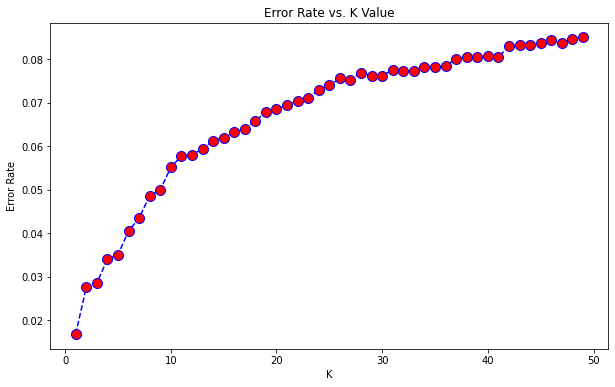

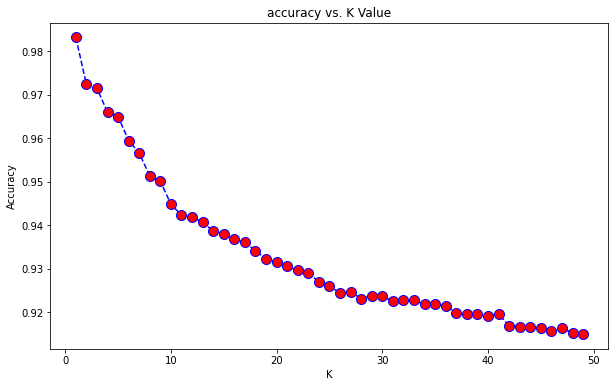

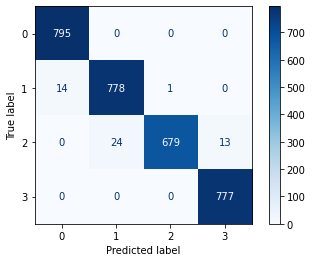

In [ ]:
#NOVEL-KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle
error_rate = []
acc = []
ps=[]
rs=[]
fs=[]
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i) #Power Parameter DEFAULT p=2
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 acc.append(accuracy_score(y_test, pred_i))#Storing the accuracy score in list
 ps.append(precision_score(y_test, pred_i, average='macro')) #Storing the precision score in list
 rs.append(recall_score(y_test, pred_i, average='macro')) #Storing recall score in list
 fs.append(f1_score(y_test, pred_i, average='macro')) #Storing f1 score in list
 file1 = open("KNN(E)", "wb") #Storing the weights of the model
 pickle.dump(knn, file1) #Model trained on grid search parameters
 file1.close()
 
#ERROR RATE vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

#ACCURACY vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
#We find the model with minimum error and maximum accuracy
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)
print("Maximum precision score:",max(acc),"at K =",ps.index(max(ps))+1)
print("Maximum recall score:",max(acc),"at K =",rs.index(max(rs))+1)
print("Maximum f1 score:",max(acc),"at K =",fs.index(max(fs))+1)


knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc))+1) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
file1 = open("KNN(E)", "wb") #Storing the weights of the model
pickle.dump(knn, file1) #Model trained on grid search parameters
file1.close()
print(classification_report(y_test, pred))# Classification Report
sklearn.metrics.plot_confusion_matrix(knn,x_test,y_test,cmap=plt.cm.Blues)    #Confusion Matrix

In [ ]:
#LOGISTIC REGRESSION cell - 1
param_grid = {'cv':[3, 5, 8, 10, 12],
              'max_iter': [100, 200, 500, 1000, 2000]}

GS_LR = GridSearchCV(LogisticRegressionCV(), param_grid)
GS_LR.fit(x_train, y_train.ravel())
print(GS_LR.best_params_)
print(GS_LR.score(x_test,y_test))

{'cv': 3, 'max_iter': 100}
0.9308666017526777


Confusion Matrix:
 [[795   0   0   0]
 [ 83 699  11   0]
 [  0  18 625  73]
 [  0   0  29 748]]
Accuracy: 93.05420318078545
Precision: 0.9328240089464747
Recall: 0.9292611975263775
F1 Score: 0.9293819382433228
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       795
           1       0.97      0.88      0.93       793
           2       0.94      0.87      0.91       716
           3       0.91      0.96      0.94       777

    accuracy                           0.93      3081
   macro avg       0.93      0.93      0.93      3081
weighted avg       0.93      0.93      0.93      3081



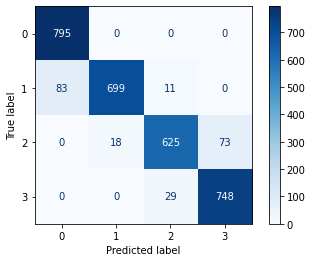

In [ ]:
# LOGISTIC REGRESSION cell -2
classifier = LogisticRegressionCV(cv=5, random_state = 0, max_iter=1000)
classifier.fit(x_train, y_train.ravel())
y_pred = classifier.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
sklearn.metrics.plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues)

In [ ]:
#MULTILAYER PERCEPTRON cell - 1
param_grid = {'activation':['relu', 'identity', 'logistic', 'tanh'],
              'max_iter': [50, 100, 150, 200],
              'alpha':[0.1, 0.5, 0.05, 0.01, 0.008],
              'learning_rate_init':[0.1, 0.5, 0.05, 0.01, 0.008]}

GS_MLP = GridSearchCV(MLPClassifier(), param_grid)
GS_MLP.fit(x_train, y_train.ravel())
print(GS_MLP.best_params_)
print(GS_MLP.score(x_test,y_test))

{'activation': 'relu', 'alpha': 0.008, 'learning_rate_init': 0.008, 'max_iter': 150}
0.9571567672833495


Confusion Matrix:
 [[794   1   0   0]
 [ 74 711   8   0]
 [  0   8 670  38]
 [  0   0   1 776]]
Accuracy: 95.78059071729957
Precision: 0.9605771776612732
Recall: 0.9574511337731326
F1 Score: 0.9577039917417735
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       795
           1       0.99      0.90      0.94       793
           2       0.99      0.94      0.96       716
           3       0.95      1.00      0.98       777

    accuracy                           0.96      3081
   macro avg       0.96      0.96      0.96      3081
weighted avg       0.96      0.96      0.96      3081



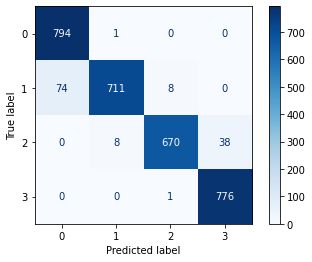

In [ ]:
#MULTILAYER PERCEPTRON cell - 2
mlp_clf = MLPClassifier(activation='relu', alpha=0.008, learning_rate_init=0.01, max_iter=100)
mlp_clf.fit(x_train, y_train.ravel())
y_pred = mlp_clf.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
sklearn.metrics.plot_confusion_matrix(mlp_clf,x_test,y_test,cmap=plt.cm.Blues)

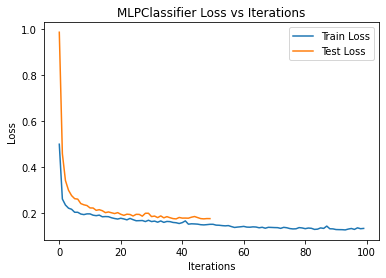

In [ ]:
#MULTILAYER PERCEPTRON cell - 3
plt.plot(mlp_clf.loss_curve_, label="Train Loss")
mlp_clf.fit(x_test, y_test.ravel())
plt.plot(mlp_clf.loss_curve_, label="Test Loss")
plt.title("MLPClassifier Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#RANDOM FOREST cell-1
# seeing the feature importance variable
model = RandomForestClassifier(n_estimators = 100)
feature_names=df.columns[:-1]
# Train the model using the training sets
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_,index=feature_names ).sort_values(ascending = False)
feature_imp

NIHSS_Score    0.219081
mRS            0.172159
bmi            0.133198
glucose        0.101074
tos            0.100004
systolic       0.079281
paralysis      0.054428
diastolic      0.046516
cholestrol     0.043889
age            0.024777
smoking        0.021275
Male           0.002221
Female         0.002096
dtype: float64

In [ ]:
#RANDOM FOREST cell-2
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'criterion':['gini','entropy'],
              'random_state':[23],
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None]}

GS_RF=GridSearchCV(RandomForestClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'random_state': 23}
0.9847452125933138


accuracy 0.9814995131450828
Confusion matrix
[[795   0   0   0]
 [ 37 752   4   0]
 [  0   0 707   9]
 [  0   0   7 770]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       795
           1       1.00      0.95      0.97       793
           2       0.98      0.99      0.99       716
           3       0.99      0.99      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

score 0.9814995131450828
precision 0.9821638096161343
recall 0.9816796906560163
F! Score 0.9816229409695858


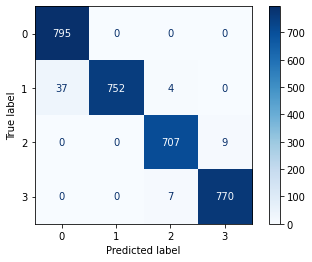

In [ ]:
#RANDOM FOREST cell-3 (took 11-12 min)
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model=RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 20, random_state= 23)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F! Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))

[]

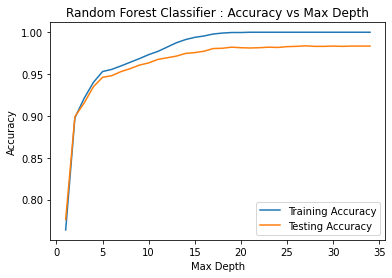

In [ ]:
#RANDOM FOREST cell-4
rf_train_score=[]
rf_test_score=[]
for i in np.arange(1, 35):
  param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[23]}
  GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
  GS_RF.fit(x_train,y_train.ravel())
  y_train_pred=GS_RF.predict(x_train)
  rf_train_score.append(accuracy_score(y_train,y_train_pred))
  y_pred=GS_RF.predict(x_test)
  rf_test_score.append(accuracy_score(y_test,y_pred))
 
plt.title("Random Forest Classifier : Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,35),rf_train_score,label="Training Accuracy")
plt.plot(np.arange(1,35),rf_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()

In [ ]:
#NAIVE BAYES (complement) cell-1
def nb_test(model,x_train,y_train):
  
  print("\n parameters: ")
  #it gives us the default parameters since those are the ones used 
  print( model.get_params(deep=True))
  print("\n log-probability estimates: ")
  print(model.predict_log_proba(x_train))
  print("\n probability estimates: ")
  print(model.predict_proba(x_train))



 parameters: 
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

 log-probability estimates: 
[[-1.11418918 -1.33731347 -1.54526799 -1.62956947]
 [-1.63905575 -1.70876671 -1.36127249 -0.9985498 ]
 [-1.07369575 -1.19051948 -1.55824205 -1.94011278]
 ...
 [-1.46242743 -1.4241048  -1.39388923 -1.27477287]
 [-1.27682413 -1.23344396 -1.44784978 -1.63621622]
 [-1.63770121 -1.69779268 -1.29786051 -1.0516214 ]]

 probability estimates: 
[[0.32818127 0.26255007 0.21325471 0.19601395]
 [0.19416329 0.18108899 0.25633439 0.36841333]
 [0.34174318 0.30406327 0.2105058  0.14368774]
 ...
 [0.23167322 0.24072386 0.24810847 0.27949444]
 [0.27892172 0.29128766 0.23507521 0.19471541]
 [0.19442647 0.18308721 0.2731155  0.34937082]]

 accuracy:  0.6358325219084713

 Confusion Matrix: 
[[784  11   0   0]
 [394 276  12 111]
 [ 20  51 126 519]
 [  0   0   4 773]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       795
           1       0

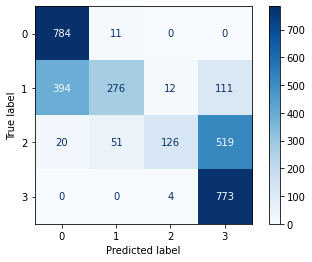

In [ ]:
#NAIVE BAYES (complement) cell-2
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import cohen_kappa_score
#Complement Naive Bayes classifier: particularly suited for imbalanced data sets
#designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier
#In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class,
#we calculate the probability of the item belonging to all the classes.
Cmodel = ComplementNB()
Cmodel.fit(x_train,y_train.ravel())
train_pred_c=Cmodel.predict(x_train)
test_pred_c=Cmodel.predict(x_test)
import warnings
warnings.filterwarnings('error')  # ignoring warning or not showing them more than once
warnings.filterwarnings('ignore')
nb_test(Cmodel,x_train,y_train)

print("\n accuracy: ",accuracy_score(y_test, test_pred_c))
cm=confusion_matrix(y_test,test_pred_c)
print("\n Confusion Matrix: ")
print(cm)
sklearn.metrics.plot_confusion_matrix(Cmodel,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, test_pred_c))
#print("Cohen Kappa Score",cohen_kappa_score(y_test, test_pred_c))
